In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette('coolwarm')

# 加载数据集
data = pd.read_csv("CW_Data.csv")

# GMM

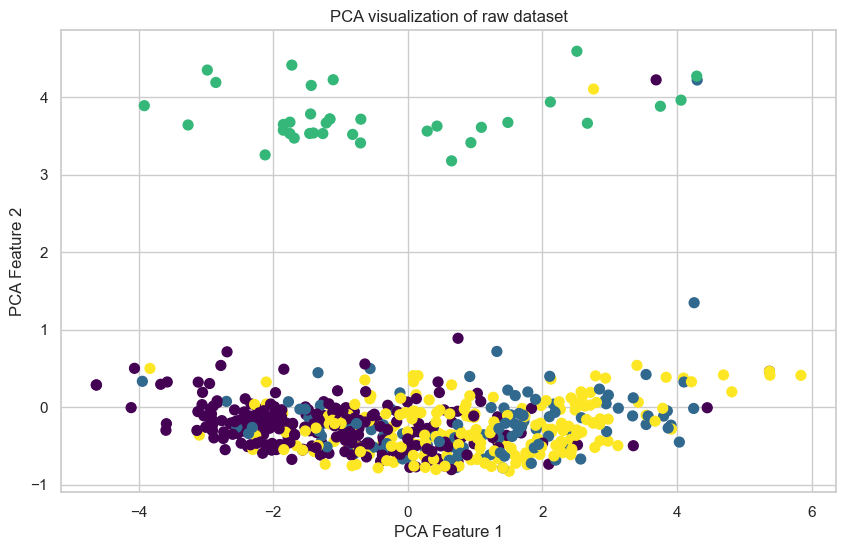

Cluster 0:
    1: 45
    2: 10
    4: 26

Cluster 1:
    1: 8
    4: 1
    2: 2

Cluster 2:
    2: 9
    4: 12
    1: 2

Cluster 3:
    4: 106
    2: 61
    1: 42

Cluster 4:
    4: 71
    1: 151
    2: 35

Cluster 5:
    3: 35
    1: 1
    2: 1
    4: 1


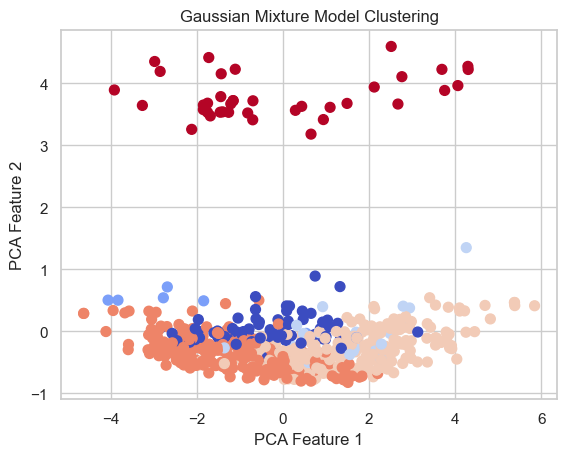

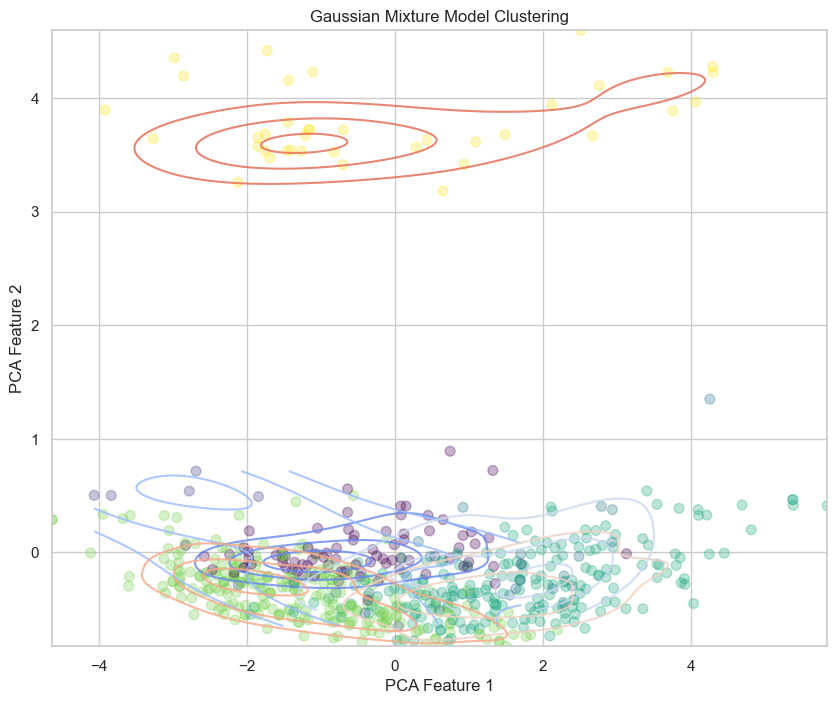

Adjusted Rand Index (ARI): 0.1384309297950754


In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
from collections import Counter
from matplotlib.patches import Ellipse
  
# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]# 特征  
y=data['Programme']
# 由于GMM通常适用于连续数值数据，因此我们通常不包括分类特征（如'Gender'）  
# 如果你有分类特征，你可能需要对其进行编码（例如，使用独热编码）  
  
# 标准化数据，因为GMM对数据的尺度敏感  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_rf)  
  
# 使用高斯混合模型进行聚类  
# 你可以尝试调整n_components参数，即你希望得到的聚类数量  
gmm = GaussianMixture(n_components=6, random_state=0, init_params='k-means++')  # 或者使用BayesianGaussianMixture  
gmm.fit(X_scaled)  
  
# 预测每个数据点的聚类标签  
labels = gmm.predict(X_scaled)  
  
# 可视化聚类结果（由于数据是多维的，我们使用PCA降维到2D）  
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  
  
# 绘制原始类别  
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')  
plt.title('PCA visualization of raw dataset')  
plt.xlabel('PCA Feature 1')  
plt.ylabel('PCA Feature 2')  
plt.show()

# 绘制聚类结果  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='coolwarm')  
plt.title('Gaussian Mixture Model Clustering')  
plt.xlabel('PCA Feature 1')  
plt.ylabel('PCA Feature 2')  


# 根据聚类标签对 y 进行分组，并计算每个聚类中 y 的分布  

cluster_distributions = {}  

for i in range(gmm.n_components):  
    cluster_mask = (labels == i)  
    cluster_y_values = y[cluster_mask]  
    distribution = Counter(cluster_y_values)  
    cluster_distributions[i] = distribution  

# 打印每个聚类的 y 分布  
for i, distribution in cluster_distributions.items():  
    print(f"Cluster {i}:")  
    for category, count in distribution.items():  
        print(f"    {category}: {count}")  
    print()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

# 假设data_no_g3是已经加载好的DataFrame  
# ...（省略加载DataFrame和前面步骤的代码）  

# PCA降维到2D  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果  
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', alpha=0.3)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# 绘制每个聚类的KDE等高线图  
for i in range(gmm.n_components):
    cluster_mask = (labels == i)
    cluster_data = X_pca[cluster_mask]

    # 使用scipy的gaussian_kde拟合KDE  
    kde = gaussian_kde(cluster_data.T)

    # 创建网格以评估KDE  
    xi, yi = np.mgrid[cluster_data[:, 0].min():cluster_data[:, 0].max():100j,
             cluster_data[:, 1].min():cluster_data[:, 1].max():100j]
    zi = kde.evaluate(np.vstack([xi.ravel(), yi.ravel()]))

    # 绘制等高线图  
    plt.contour(xi, yi, zi.reshape(xi.shape), colors=[f'C{i}'], alpha=0.8, levels=3)
    # plt.contour(xi, yi, zi.reshape(xi.shape), colors=['viridis'], alpha=0.8, levels=3)
plt.show()

from sklearn.metrics import adjusted_rand_score
# 计算兰德指数（实际上是调整兰德指数ARI）  
ari = adjusted_rand_score(y, labels)  
print(f"Adjusted Rand Index (ARI): {ari}")

C:\Users\20393\AppData\Local\Temp\ipykernel_25100\3677380742.py:47: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_25100\3677380742.py:47: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_25100\3677380742.py:47: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_25100\36

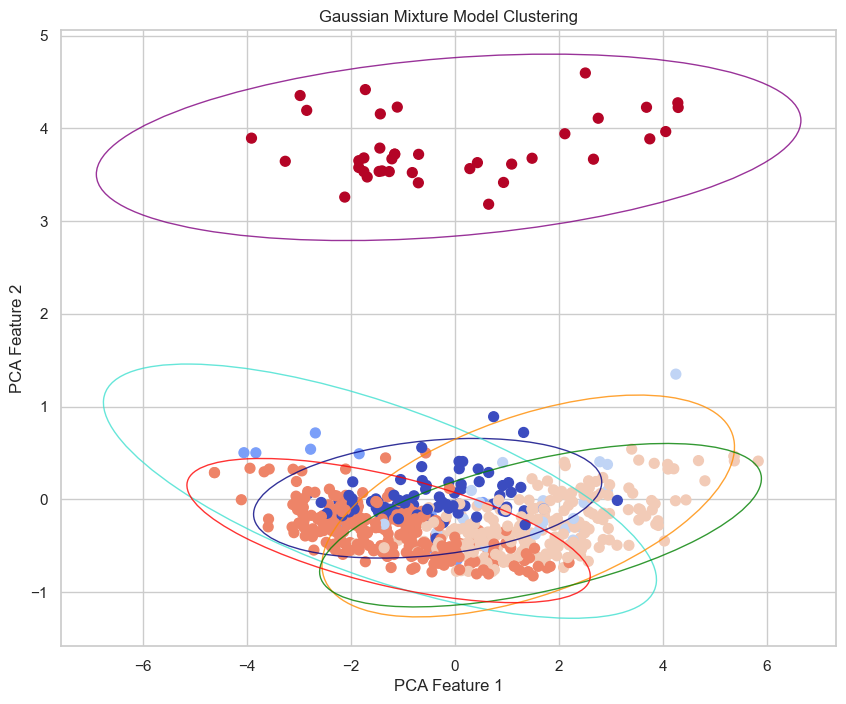

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# 假设data_no_g3是已经加载好的DataFrame
# X_rf是特征, y是目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 标准化数据，因为GMM对数据的尺度敏感
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(n_components=6, random_state=0, init_params='k-means++')
gmm.fit(X_scaled)

# 预测每个数据点的聚类标签
labels = gmm.predict(X_scaled)

# 可视化聚类结果（由于数据是多维的，我们使用PCA降维到2D）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='coolwarm')

# 绘制每个聚类的椭圆
def draw_ellipse(position, covariance, ax, color, **kwargs):
    """
    Draw an ellipse with a given position and covariance, and specified edge color.
    """
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(3, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, edgecolor=color, fill=False, **kwargs))

# 获取每个聚类的均值和协方差
means = gmm.means_
covariances = gmm.covariances_

# 绘制椭圆
ax = plt.gca()
colors = ['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple']
for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):
    transformed_mean = pca.transform([mean])
    transformed_covariance = pca.components_ @ covar @ pca.components_.T
    draw_ellipse(transformed_mean[0], transformed_covariance, ax, color=color, alpha=0.8)

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


Initialization 0
  Iteration 1	 time lapse 0.00000s	 ll change inf
  Iteration 2	 time lapse 0.00000s	 ll change 0.06519
  Iteration 3	 time lapse 0.00100s	 ll change 0.45859
  Iteration 4	 time lapse 0.00000s	 ll change 0.78617
  Iteration 5	 time lapse 0.00000s	 ll change 0.18525
  Iteration 6	 time lapse 0.00100s	 ll change 0.07568
  Iteration 7	 time lapse 0.00000s	 ll change 0.10284
  Iteration 8	 time lapse 0.00000s	 ll change 0.07953
  Iteration 9	 time lapse 0.00000s	 ll change 0.03655
  Iteration 10	 time lapse 0.00100s	 ll change 0.01479
  Iteration 11	 time lapse 0.00000s	 ll change 0.00816
  Iteration 12	 time lapse 0.00000s	 ll change 0.00488
  Iteration 13	 time lapse 0.00100s	 ll change 0.00292
  Iteration 14	 time lapse 0.00000s	 ll change 0.00174
  Iteration 15	 time lapse 0.00000s	 ll change 0.00106
  Iteration 16	 time lapse 0.00000s	 ll change 0.00068
Initialization converged: True	 time lapse 0.00399s	 ll -9.52241


C:\Users\20393\AppData\Local\Temp\ipykernel_25100\1959148827.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 4)
C:\Users\20393\AppData\Local\Temp\ipykernel_25100\1959148827.py:51: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_25100\1959148827.py:51: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel

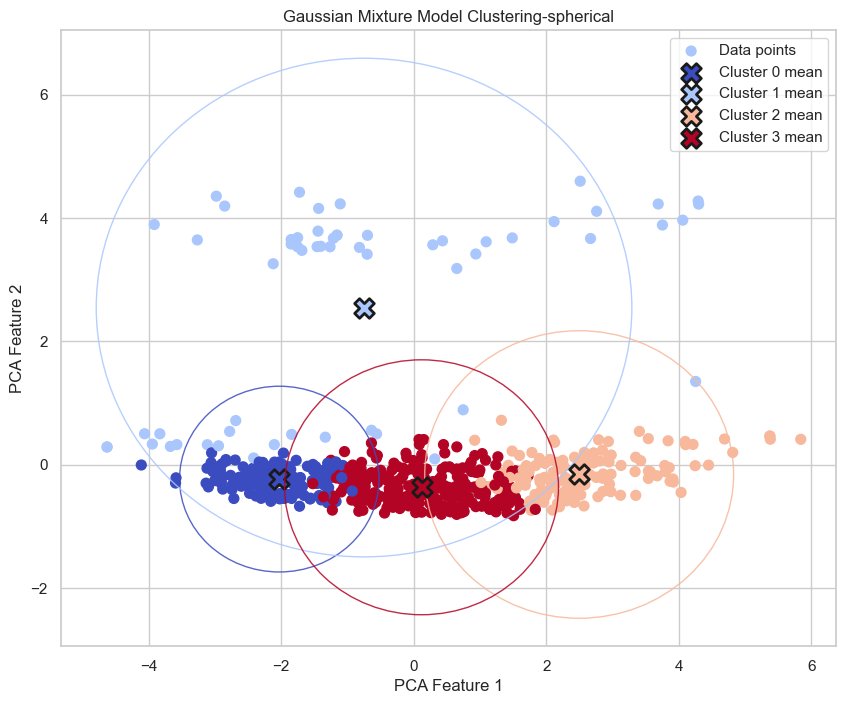

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# 假设data是已经加载好的DataFrame
# X_rf是特征, y是目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 标准化数据，因为GMM对数据的尺度敏感
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# 使用高斯混合模型进行聚类
gmm = GaussianMixture(covariance_type='spherical', n_components=4, random_state=0, init_params='random', verbose=3, verbose_interval=1)
gmm.fit(X_scaled)

# 预测每个数据点的聚类标签
labels_gmm = gmm.predict(X_scaled)

# 将标签和原始数据结合
data['Cluster-gmm'] = labels_gmm

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-gmm', 'Programme']).size().unstack(fill_value=0)

# 可视化聚类结果（由于数据是多维的，我们使用PCA降维到2D）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类结果
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, s=50, cmap='coolwarm', label='Data points')

# 绘制每个聚类的椭圆
def draw_ellipse(position, covariance, ax, color, **kwargs):
    """
    Draw an ellipse with a given position and covariance, and specified edge color.
    """
    if np.isscalar(covariance):  # spherical covariance
        covariance = np.eye(2) * covariance
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    
    for nsig in range(3, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, edgecolor=color, fill=False, **kwargs))

# 获取每个聚类的均值和协方差
means = gmm.means_
covariances = gmm.covariances_

# 使用颜色映射工具生成颜色
cmap = plt.cm.get_cmap('coolwarm', 4)

# 绘制椭圆
ax = plt.gca()
for i, (mean, covar) in enumerate(zip(means, covariances)):
    transformed_mean = pca.transform([mean])
    if np.isscalar(covar):
        covar = np.eye(len(mean)) * covar
    transformed_covariance = pca.components_ @ covar @ pca.components_.T
    transformed_covariance = transformed_covariance[:2, :2]  # 保证是2x2矩阵
    color = cmap(i)
    draw_ellipse(transformed_mean[0], transformed_covariance, ax, color=color, alpha=0.85)

    # 绘制每个聚类的均值点
    plt.scatter(transformed_mean[0, 0], transformed_mean[0, 1], color=color, s=200, marker='X', edgecolor='k', linewidth=2, label=f'Cluster {i} mean')

plt.title('Gaussian Mixture Model Clustering-spherical')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


Initialization 0
  Iteration 1	 time lapse 0.00000s	 ll change inf
  Iteration 2	 time lapse 0.00000s	 ll change 0.22520
  Iteration 3	 time lapse 0.00000s	 ll change 3.00617
  Iteration 4	 time lapse 0.00000s	 ll change 4.84677
  Iteration 5	 time lapse 0.00099s	 ll change 0.54562
  Iteration 6	 time lapse 0.00000s	 ll change 0.11221
  Iteration 7	 time lapse 0.00000s	 ll change 0.02549
  Iteration 8	 time lapse 0.00000s	 ll change 0.04695
  Iteration 9	 time lapse 0.00000s	 ll change 0.07055
  Iteration 10	 time lapse 0.00100s	 ll change 0.07374
  Iteration 11	 time lapse 0.00000s	 ll change 0.06919
  Iteration 12	 time lapse 0.00000s	 ll change 0.06900
  Iteration 13	 time lapse 0.00000s	 ll change 0.14715
  Iteration 14	 time lapse 0.00000s	 ll change 0.55936
  Iteration 15	 time lapse 0.00000s	 ll change 1.56462
  Iteration 16	 time lapse 0.00100s	 ll change 1.46788
  Iteration 17	 time lapse 0.00000s	 ll change 0.25436
  Iteration 18	 time lapse 0.00000s	 ll change 0.01460
  Iter

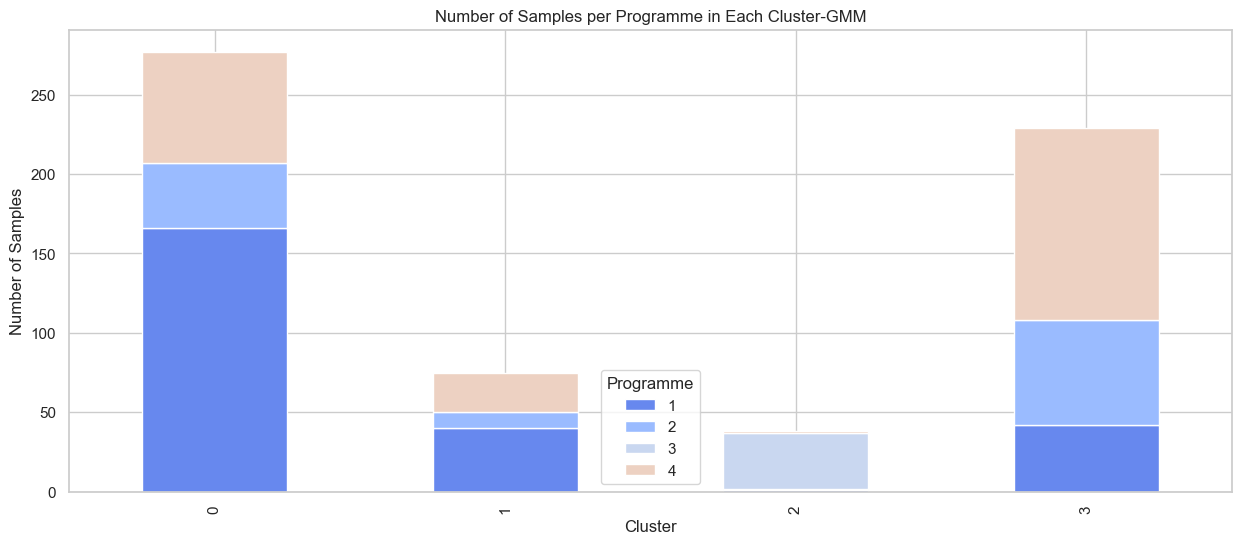

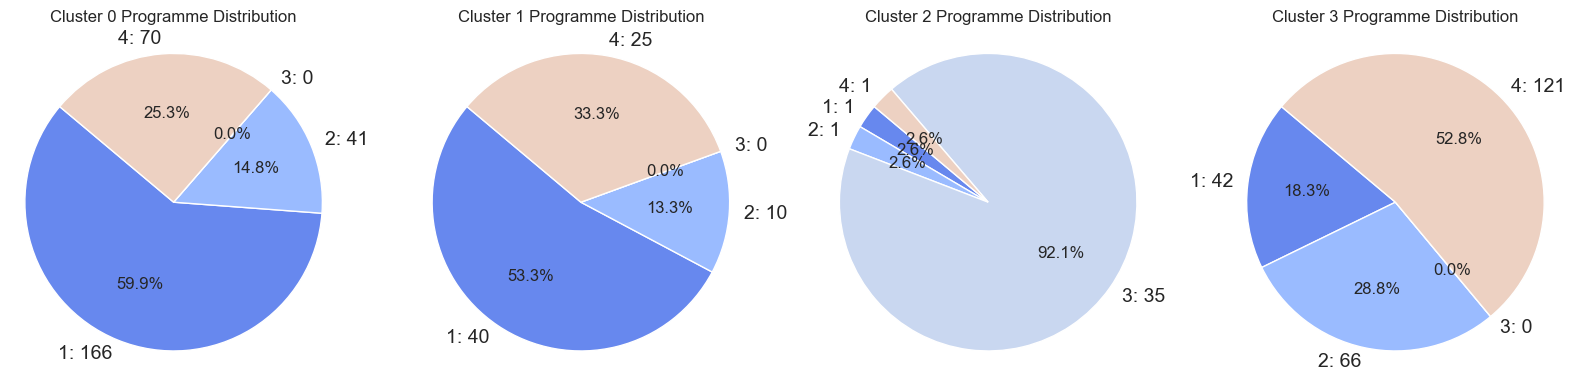

C:\Users\20393\AppData\Local\Temp\ipykernel_23920\2383860406.py:102: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_23920\2383860406.py:102: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_23920\2383860406.py:102: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,
C:\Users\20393\AppData\Local\Temp\ipykernel_23920

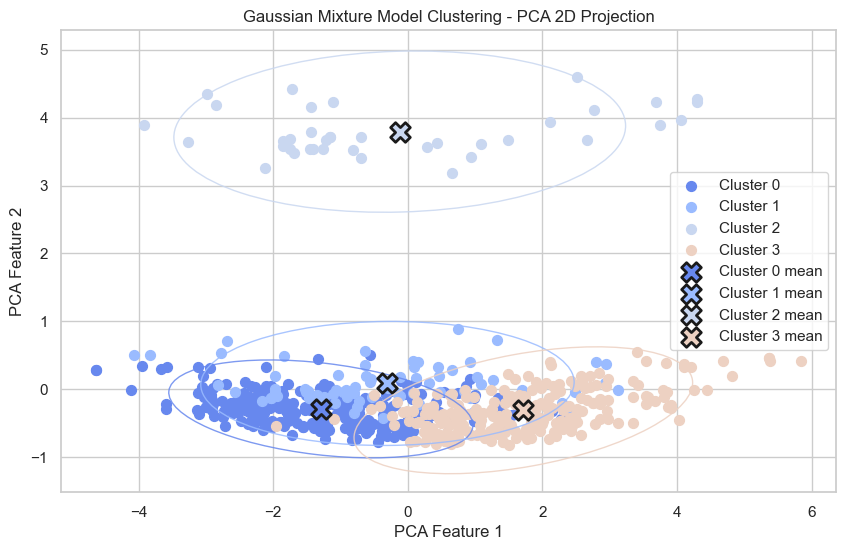

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# 假设data是已经加载好的DataFrame
# X_rf是特征, y是目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 标准化数据，因为GMM对数据的尺度敏感
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

n_clusters = 4
# 使用高斯混合模型进行聚类
gmm = GaussianMixture(covariance_type='diag', n_components=n_clusters, random_state=0, init_params='random', verbose=3, verbose_interval=1)
gmm.fit(X_scaled)

# 预测每个数据点的聚类标签
labels_gmm = gmm.predict(X_scaled)

# 将标签和原始数据结合
data['Cluster-gmm'] = labels_gmm

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-gmm', 'Programme']).size().unstack(fill_value=0)


# 预测每个数据点的聚类标签
labels_gmm = gmm.predict(X_scaled)
 

# 绘制条形图
cluster_programme_counts.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Number of Samples per Programme in Each Cluster-GMM')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Programme')
plt.show()

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-gmm', 'Programme']).size().unstack(fill_value=0)
# 设置子图的行列数
num_clusters = cluster_programme_counts.shape[0]
fig, axes = plt.subplots(1, num_clusters, figsize=(16, 4))

# 绘制每个簇的饼图
for i, cluster in enumerate(cluster_programme_counts.index):
    counts = cluster_programme_counts.loc[cluster]
    # counts = counts[counts > 0]  # 只显示数量大于0的部分
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        counts, 
        labels=[f'{prog}: {count}' for prog, count in counts.items()], 
        autopct='%1.1f%%',
        startangle=140
    )
    # 设置标签和自动文本的字体大小
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        
    ax.set_title(f'Cluster {cluster} Programme Distribution')
    ax.axis('equal')  # 确保饼图是圆形的

plt.tight_layout()
plt.show()


# 可视化聚类结果（由于数据是多维的，我们使用PCA降维到2D）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 获取每个聚类的均值和协方差
means = gmm.means_
covariances = gmm.covariances_

# 绘制降维后的数据点，并使用不同的颜色表示不同的聚类
plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    plt.scatter(X_pca[labels_gmm == i, 0], X_pca[labels_gmm == i, 1], 
                s=50, label=f'Cluster {i}')

# 绘制每个聚类的椭圆
def draw_ellipse(position, covariance, ax, **kwargs):
    """
    Draw an ellipse with a given position and covariance.
    """
    if covariance.shape[0] != 2:  # Convert diagonal to full matrix if needed
        covariance = np.diag(covariance)
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    
    for nsig in range(3, 4):  # Use nsig = 1 for 1 standard deviation ellipse
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, fill=False, **kwargs))

ax = plt.gca()

for i, (mean, covar) in enumerate(zip(means, covariances)):
    transformed_mean = pca.transform([mean])
    transformed_covariance = pca.components_ @ np.diag(covar) @ pca.components_.T
    transformed_covariance = transformed_covariance[:2, :2]  # 保证是2x2矩阵
    color = next(ax._get_lines.prop_cycler)['color']
    draw_ellipse(transformed_mean[0], transformed_covariance, ax, edgecolor=color, alpha=0.85)

    # 绘制每个聚类的均值点
    plt.scatter(transformed_mean[0, 0], transformed_mean[0, 1], color=color, 
                s=200, marker='X', edgecolor='k', linewidth=2, label=f'Cluster {i} mean')

plt.title('Gaussian Mixture Model Clustering - PCA 2D Projection')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import adjusted_rand_score, make_scorer

# 假设data是已经加载好的DataFrame
# X_rf是特征, y是目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 定义评分函数
rai_scorer = make_scorer(adjusted_rand_score, greater_is_better=True)

# 标准化数据
scaler = StandardScaler()

# 定义GMM模型
gmm = GaussianMixture(random_state=0)

# 定义参数网格
param_grid = {
    'gmm__n_components': [2, 3, 4, 5],  # 可以尝试不同的组件数量
    'gmm__covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# 使用Pipeline将数据标准化和GMM模型结合
pipeline = Pipeline([
    ('scaler', scaler),
    ('gmm', gmm)
])

# 使用GridSearchCV来搜索最佳参数
search = GridSearchCV(pipeline, param_grid, cv=5, scoring=rai_scorer)
search.fit(X_rf, y)

# 输出最佳参数和最佳分数
print("Best parameters found: ", search.best_params_)
print("Best cross-validation score: ", search.best_score_)


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Best parameters found:  {'gmm__covariance_type': 'tied', 'gmm__n_components': 3}
Best cross-validation score:  0.18427747180697612


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

covariance_type: diag, n_components: 2, ARI: 0.15007781410548815
covariance_type: diag, n_components: 3, ARI: 0.16452117402913588
covariance_type: diag, n_components: 4, ARI: 0.1676016556839874
covariance_type: diag, n_components: 5, ARI: 0.10965881040974361
covariance_type: diag, n_components: 6, ARI: 0.12969024970438547
covariance_type: diag, n_components: 7, ARI: 0.12602368074266831
covariance_type: diag, n_components: 8, ARI: 0.1482788309407908
covariance_type: diag, n_components: 9, ARI: 0.12430626677013584
covariance_type: diag, n_components: 10, ARI: 0.11825164592401176
covariance_type: diag, n_components: 11, ARI: 0.10351920378047737
covariance_type: diag, n_components: 12, ARI: 0.09938384358612545
covariance_type: diag, n_components: 13, ARI: 0.10673475249126109
covariance_type: diag, n_components: 14, ARI: 0.09655118015251024
covariance_type: diag, n_components: 15, ARI: 0.10447332188307501
covariance_type: diag, n_components: 16, ARI: 0.10365882461981366
covariance_type: ful

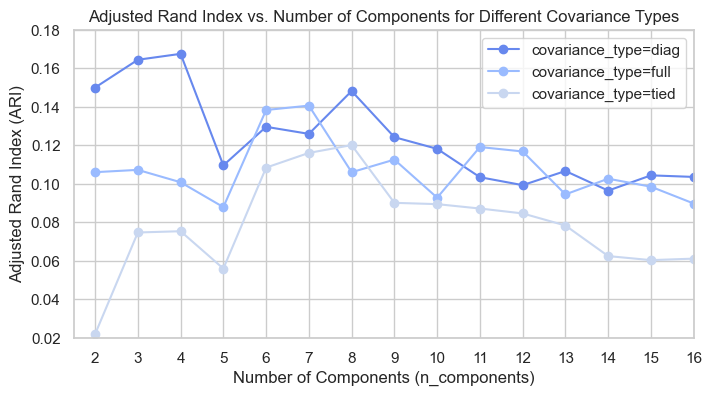

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# 假设data是已经加载好的DataFrame
# X_rf是特征, y是目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = data['Programme']

# 标准化数据，因为GMM对数据的尺度敏感
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# 定义covariance_type列表
covariance_types = ['diag', 'full', 'tied']

# 计算不同n_components的调整兰德系数
ari_scores_dict = {cov_type: [] for cov_type in covariance_types}
n_components_range = range(2, 17)

for cov_type in covariance_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(covariance_type=cov_type, n_components=n_components, init_params='k-means++', random_state=0)
        gmm.fit(X_scaled)
        labels = gmm.predict(X_scaled)
        ari = adjusted_rand_score(y, labels)
        ari_scores_dict[cov_type].append(ari)
        print(f'covariance_type: {cov_type}, n_components: {n_components}, ARI: {ari}')

# 绘制n_components与调整兰德系数之间的折线图
plt.figure(figsize=(8, 4))

for cov_type in covariance_types:
    plt.plot(n_components_range, ari_scores_dict[cov_type], marker='o', label=f'covariance_type={cov_type}')

plt.title('Adjusted Rand Index vs. Number of Components for Different Covariance Types')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.xticks(n_components_range)
plt.ylim(0.02, 0.18)  # 设置纵坐标范围
plt.xlim(1.5, 16)
plt.legend()
plt.grid(True)
plt.show()


In [71]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.mixture import GaussianMixture
# import matplotlib.pyplot as plt
# 
# # 假设 features_scaled 是已经预处理和标准化的特征数据
# n_components = np.arange(1, 50)  # 考虑的组件数
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled) for n in n_components]
# 
# # 提取每个模型的AIC和BIC
# aics = [model.aic(X_scaled) for model in models]
# bics = [model.bic(X_scaled) for model in models]
# 
# # 计算每个模型的总对数似然度
# total_likelihoods = [model.score(X_scaled) * len(X_scaled) for model in models]
# 
# # 绘制AIC, BIC和模型总对数似然度
# plt.figure(figsize=(15, 5))
# plt.plot(n_components, aics, label='AIC', marker='o')
# plt.plot(n_components, bics, label='BIC', marker='o')
# plt.plot(n_components, total_likelihoods, label='Total Model Likelihood', marker='o')
# plt.xlabel('Number of components')
# plt.ylabel('Scores')
# plt.legend()
# plt.title('Model Selection Criteria')
# plt.grid(True)
# plt.show()

# K-means

Cluster centers:
[[ 3.91017566  0.37788733  0.31414652  0.06961911  0.02450916  0.23320086
   0.46870131  0.34931715]
 [-0.25574299  1.02500109  0.86831045  0.41936489  0.87832153  0.54715625
   0.68668534  0.84744755]
 [-0.25574299 -0.119418   -0.24195408  0.24386048 -0.19495054  0.13315581
   0.02061931 -0.34454413]
 [-0.1058898  -1.32763306 -0.87003937 -1.04947794 -0.90000367 -1.07031916
  -1.12157541 -0.66430648]]


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


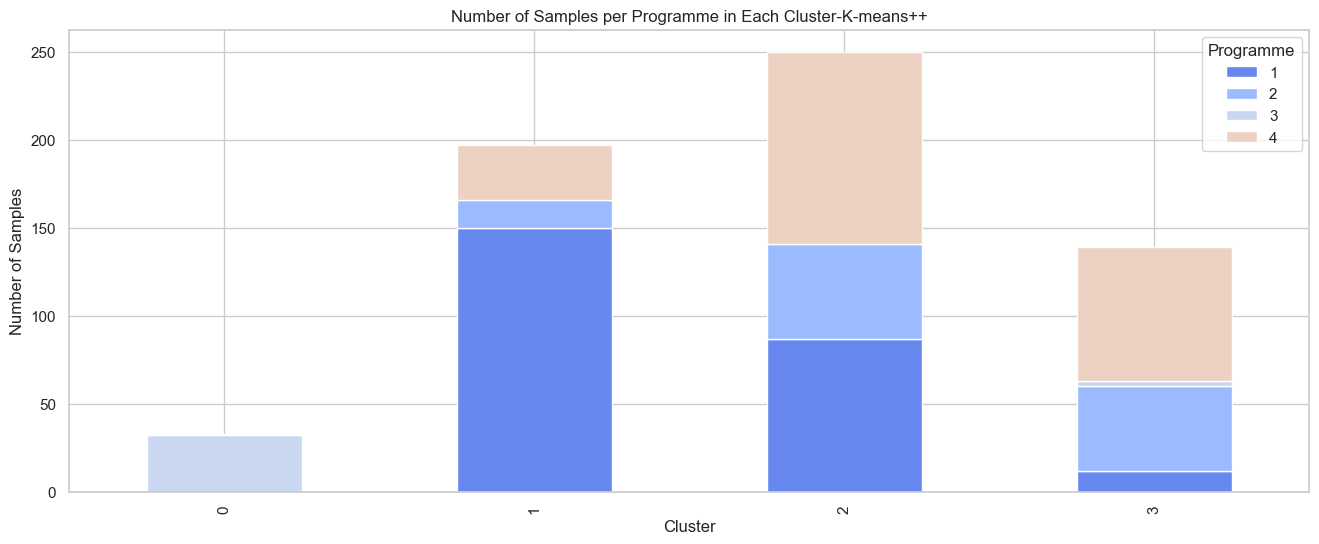

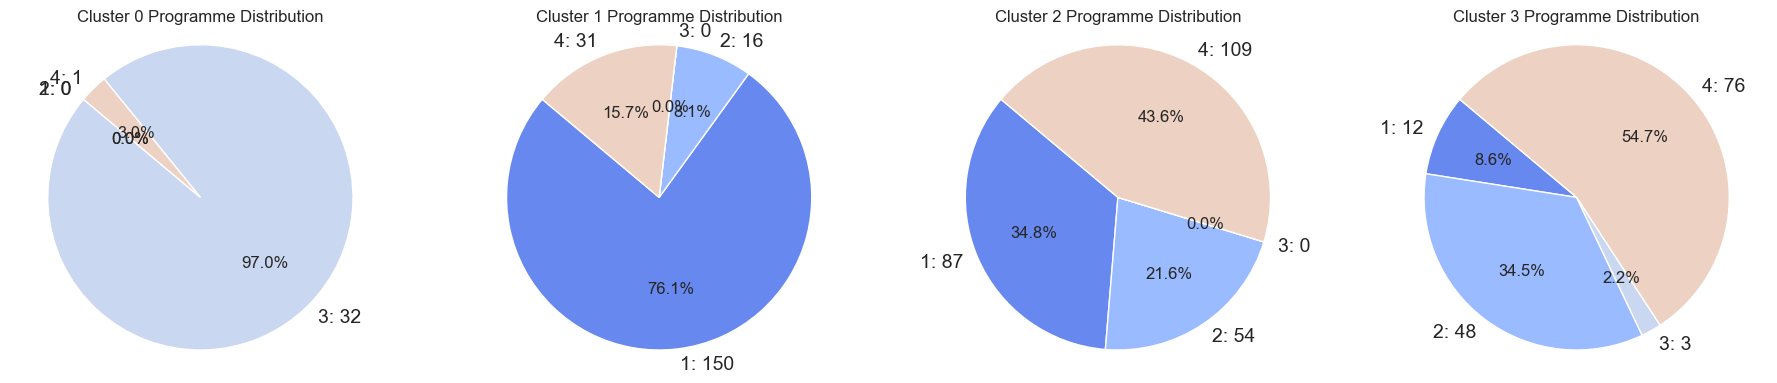

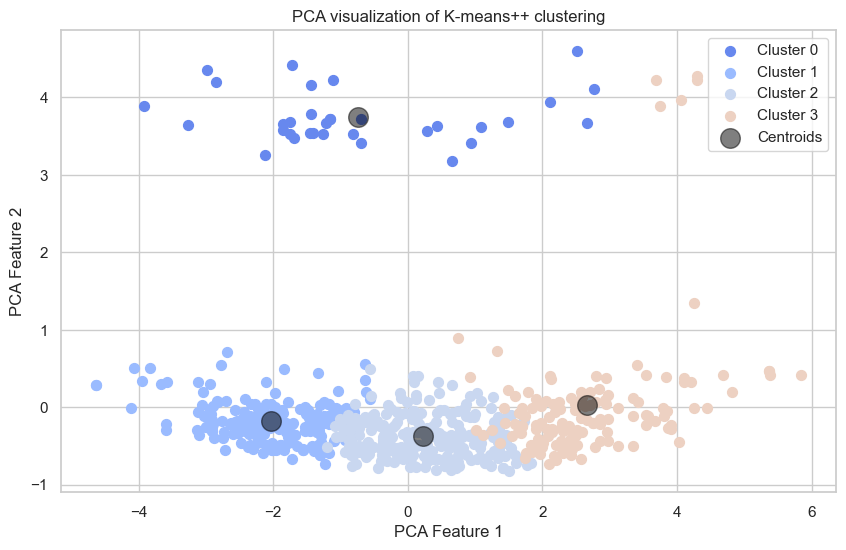

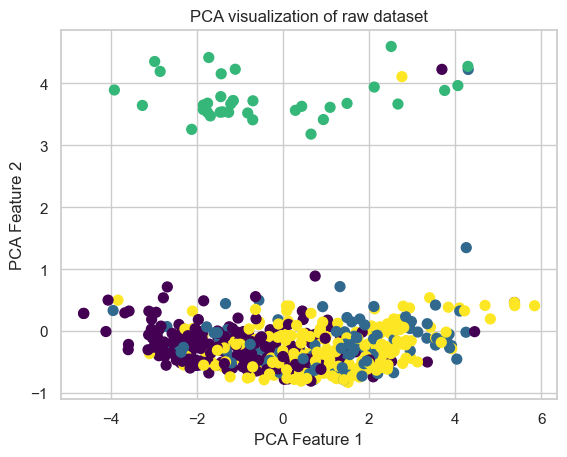

Cluster 0:
    3: 32
    4: 1

Cluster 1:
    1: 150
    4: 31
    2: 16

Cluster 2:
    1: 87
    4: 109
    2: 54

Cluster 3:
    4: 76
    1: 12
    2: 48
    3: 3

Adjusted Rand Index (ARI): 0.18729766330031575


In [95]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler

# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]# 特征  
# X_rf = data[['Grade', 'Gender', 'Q1','Q4']]
y=data['Programme']

# 假设data_no_g3是已经加载好的DataFrame  
# X_rf和y已经定义  
  
# 标准化数据  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_rf)  
  
# 设定聚类的数量（例如，我们假设要聚成3类）  
n_clusters = 4  
  
# 使用K-means进行聚类  
kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='random')  
kmeans.fit(X_scaled)  
  
# 预测每个数据点的聚类标签  
labels_kmeans = kmeans.predict(X_scaled)  
  
# 打印聚类中心  
print("Cluster centers:")  
print(kmeans.cluster_centers_)  

# 可以将聚类标签添加到原始DataFrame中以便后续分析  
data['Cluster-kmeans'] = labels_kmeans  

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-kmeans', 'Programme']).size().unstack(fill_value=0)

# 绘制条形图
cluster_programme_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Number of Samples per Programme in Each Cluster-K-means++')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Programme')
plt.show()

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-kmeans', 'Programme']).size().unstack(fill_value=0)
# 设置子图的行列数
num_clusters = cluster_programme_counts.shape[0]
fig, axes = plt.subplots(1, num_clusters, figsize=(18, 4))

# 绘制每个簇的饼图
for i, cluster in enumerate(cluster_programme_counts.index):
    counts = cluster_programme_counts.loc[cluster]
    # counts = counts[counts > 0]  # 只显示数量大于0的部分
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        counts, 
        labels=[f'{prog}: {count}' for prog, count in counts.items()], 
        autopct='%1.1f%%',
        startangle=140
    )
    # 设置标签和自动文本的字体大小
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        
    ax.set_title(f'Cluster {cluster} Programme Distribution')
    ax.axis('equal')  # 确保饼图是圆形的
plt.tight_layout()
plt.show()


# 使用PCA进行降维到2维  
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  

# 绘制降维后的数据点，并使用不同的颜色表示不同的聚类  
plt.figure(figsize=(10, 6))  
for i in range(n_clusters):  
    # 找到属于当前聚类的数据点  
    plt.scatter(X_pca[labels_kmeans == i, 0], X_pca[labels_kmeans == i, 1], s=50, label=f'Cluster {i}')  

# 绘制聚类中心  
centers = pca.transform(kmeans.cluster_centers_)  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Centroids')  

plt.title("PCA visualization of K-means++ clustering")  
plt.xlabel("PCA Feature 1")  
plt.ylabel("PCA Feature 2")  
plt.legend()  
plt.show()


# 绘制原始类别  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.title('PCA visualization of raw dataset')  
plt.xlabel('PCA Feature 1')  
plt.ylabel('PCA Feature 2')  
plt.show()


# 根据聚类标签对 y 进行分组，并计算每个聚类中 y 的分布  

cluster_distributions = {}  

for i in range(gmm.n_components):  
    cluster_mask = (labels_kmeans == i)  
    cluster_y_values = y[cluster_mask]  
    distribution = Counter(cluster_y_values)  
    cluster_distributions[i] = distribution  

# 打印每个聚类的 y 分布  
for i, distribution in cluster_distributions.items():  
    print(f"Cluster {i}:")  
    for category, count in distribution.items():  
        print(f"    {category}: {count}")  
    print()


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.mixture import GaussianMixture
# from sklearn.decomposition import PCA
# from scipy.stats import gaussian_kde
# 
# 
# # 绘制聚类结果  
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, s=50, cmap='viridis', alpha=0.3)
# plt.title('K-means Clustering')
# plt.xlabel('PCA Feature 1')
# plt.ylabel('PCA Feature 2')
# 
# # 绘制每个聚类的KDE等高线图  
# for i in range(gmm.n_components):
#     cluster_mask = (labels_kmeans == i)
#     cluster_data = X_pca[cluster_mask]
#     # 使用scipy的gaussian_kde拟合KDE  
#     kde = gaussian_kde(cluster_data.T)
#     # 创建网格以评估KDE  
#     xi, yi = np.mgrid[cluster_data[:, 0].min():cluster_data[:, 0].max():100j,
#              cluster_data[:, 1].min():cluster_data[:, 1].max():100j]
#     zi = kde.evaluate(np.vstack([xi.ravel(), yi.ravel()]))
#     # 绘制等高线图  
#     plt.contour(xi, yi, zi.reshape(xi.shape), colors=[f'C{i}'], alpha=1, levels=3)
#     
# plt.show()

    
from sklearn.metrics import adjusted_rand_score
# 计算兰德指数（实际上是调整兰德指数ARI）  
ari = adjusted_rand_score(y, labels_kmeans)  
print(f"Adjusted Rand Index (ARI): {ari}")

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

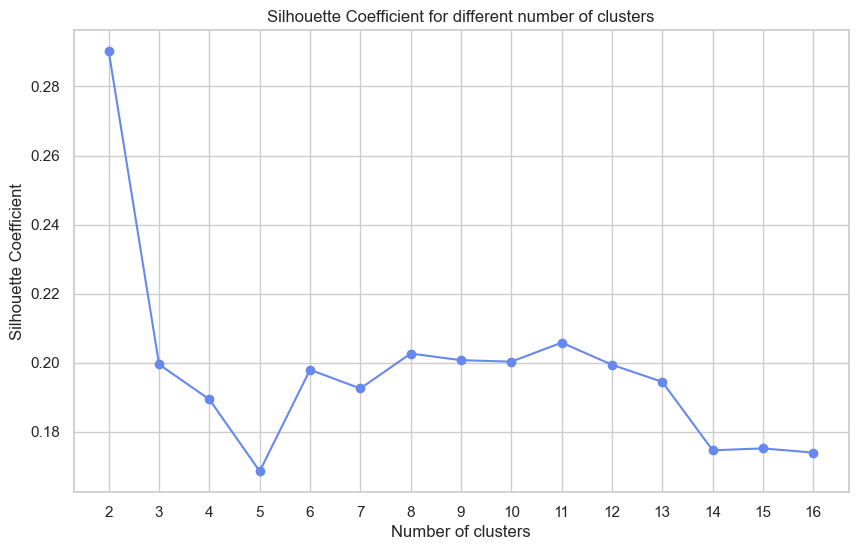

In [106]:
# 轮廓系数
# 设定一系列可能的聚类数量  
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]  
  
# 用于存储每个K值的轮廓系数  
silhouette_avg = []  
  
# 遍历不同的聚类数量  
for n_clust in range_n_clusters:  
    # 使用KMeans进行聚类  
    kmeans = KMeans(n_clusters=n_clust, random_state=0, init='k-means++')  # 使用'k-means++'初始化通常更好  
    kmeans.fit(X_scaled)  
    # 获取聚类标签  
    labels = kmeans.labels_  
    # 计算轮廓系数  
    silhouette_avg.append(silhouette_score(X_scaled, labels))  
  
# 绘制轮廓系数折线图  
plt.figure(figsize=(10, 6))  
plt.plot(range_n_clusters, silhouette_avg, marker='o')  
plt.xlabel('Number of clusters')  
plt.ylabel('Silhouette Coefficient')  
plt.title('Silhouette Coefficient for different number of clusters')  
plt.xticks(range_n_clusters)  
plt.show()

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

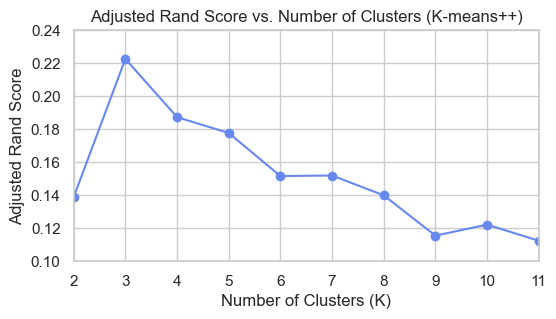

[0.13884836758986568, 0.2226086905723383, 0.18729766330031575, 0.17767902827284424, 0.15159353347817714, 0.15191919209074775, 0.13990892166165284, 0.11548663104640548, 0.12214407025636467, 0.11239309746884327, 0.10018733777676642]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 假设你已经准备好了数据 X_scaled 和 y

# 初始化空列表，用于存储不同 K 对应的兰德系数
rand_scores = []

# 尝试不同的 K 值
k_values = range(2, 13)
for k in k_values:
    # 创建并拟合 KMeans 模型
    kmeans = KMeans(n_clusters=k, random_state=0, init='random')
    kmeans.fit(X_scaled)
    
    # 预测每个数据点的聚类标签
    labels = kmeans.predict(X_scaled)
    
    # 计算兰德系数
    rand_score = adjusted_rand_score(y, labels)
    rand_scores.append(rand_score)

# 绘制兰德系数随 K 变化的折线图
plt.figure(figsize=(6, 3)) 
plt.plot(k_values, rand_scores, marker='o')
plt.title('Adjusted Rand Score vs. Number of Clusters (K-means++)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.xlim(2,11)
plt.ylim(0.1,0.24)
plt.show()
print(rand_scores)

# 层次聚类

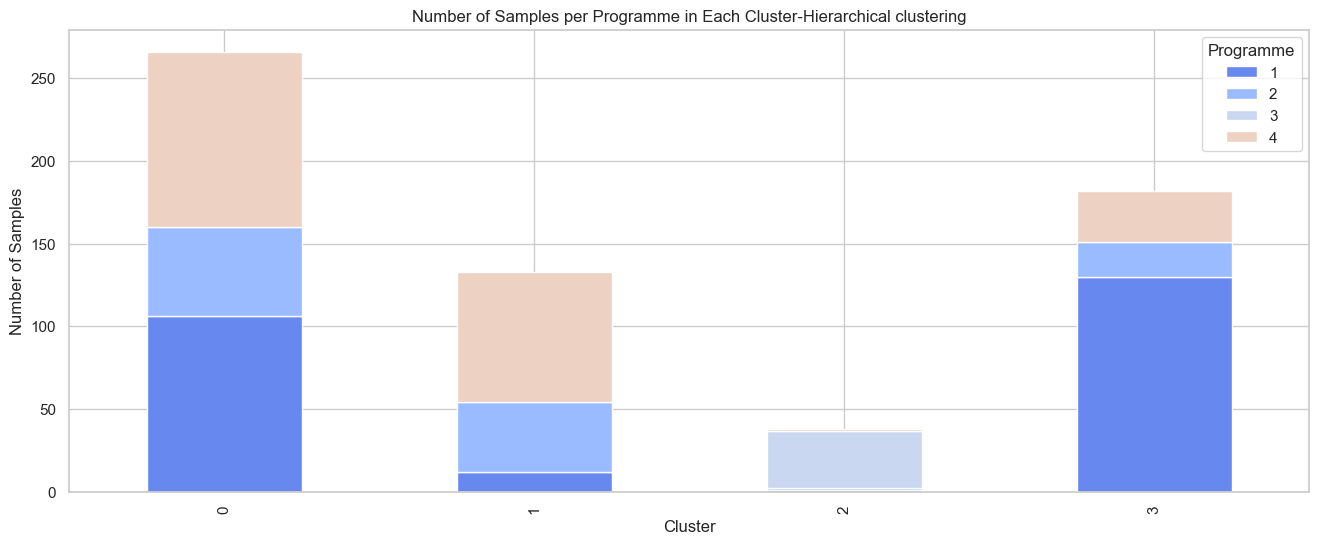

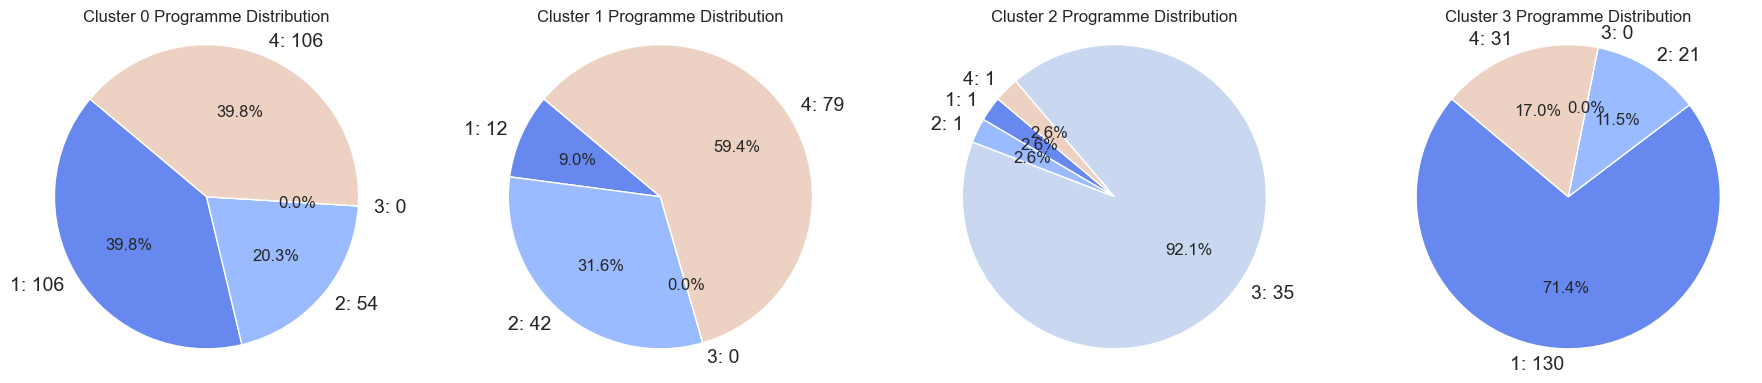

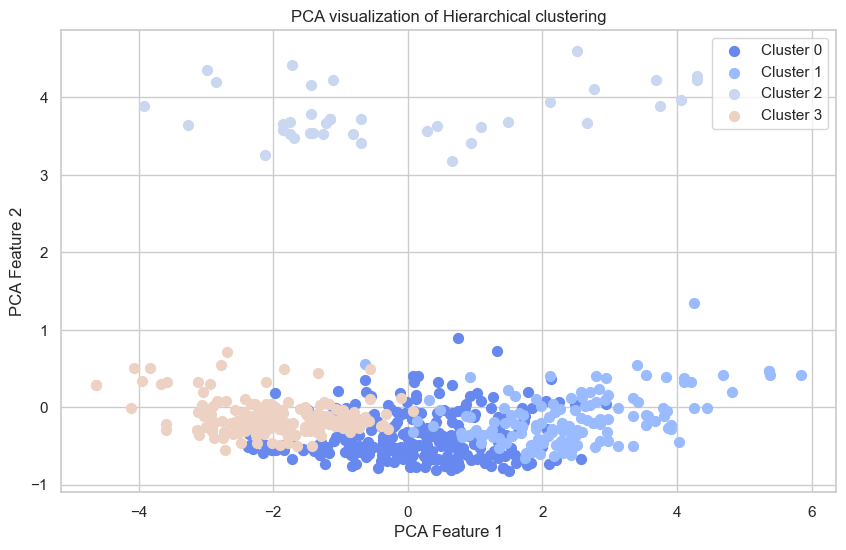

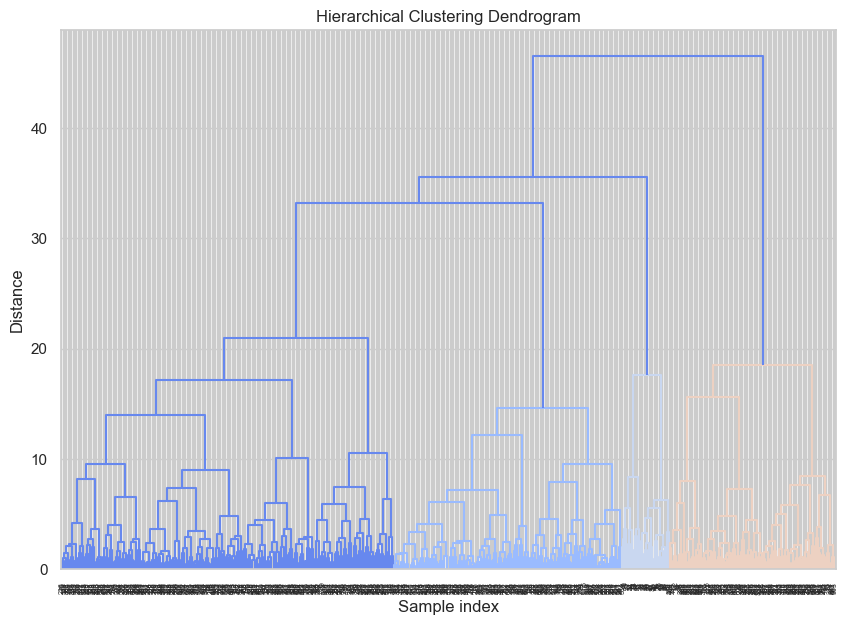

Adjusted Rand Index (ARI): 0.10018733777676642


In [17]:
from sklearn.cluster import AgglomerativeClustering  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt  
from scipy.cluster.hierarchy import dendrogram, linkage  
  
# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]# 特征 
y=data['Programme']
# 假设data_no_g3是已经加载好的DataFrame  
# X_rf和y已经定义  
  
# 标准化数据  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_rf)

# 使用层次聚类进行聚类（例如，我们设定要得到4个簇）  
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels_hiera = agg_clustering.fit_predict(X_scaled)

# 将标签和原始数据结合
data['Cluster-hiera'] = labels_hiera

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-hiera', 'Programme']).size().unstack(fill_value=0)

# 绘制条形图
cluster_programme_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Number of Samples per Programme in Each Cluster-Hierarchical clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='Programme')
plt.show()

# 计算每个簇中不同Programme的数量
cluster_programme_counts = data.groupby(['Cluster-hiera', 'Programme']).size().unstack(fill_value=0)
# 设置子图的行列数
num_clusters = cluster_programme_counts.shape[0]
fig, axes = plt.subplots(1, num_clusters, figsize=(18, 4))

# 绘制每个簇的饼图
for i, cluster in enumerate(cluster_programme_counts.index):
    counts = cluster_programme_counts.loc[cluster]
    # counts = counts[counts > 0]  # 只显示数量大于0的部分
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        counts, 
        labels=[f'{prog}: {count}' for prog, count in counts.items()], 
        autopct='%1.1f%%',
        startangle=140
    )
    # 设置标签和自动文本的字体大小
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        
    ax.set_title(f'Cluster {cluster} Programme Distribution')
    ax.axis('equal')  # 确保饼图是圆形的

plt.tight_layout()
plt.show()


# 可视化聚类结果（由于数据是多维的，我们使用PCA降维到2D）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制降维后的数据点，并使用不同的颜色表示不同的聚类  
plt.figure(figsize=(10, 6))  
for i in range(n_clusters):  
    # 找到属于当前聚类的数据点  
    plt.scatter(X_pca[labels_hiera == i, 0], X_pca[labels_hiera == i, 1], s=50, label=f'Cluster {i}')  

plt.title("PCA visualization of Hierarchical clustering")  
plt.xlabel("PCA Feature 1")  
plt.ylabel("PCA Feature 2")  
plt.legend()  
plt.show()


# 绘制层次聚类的谱系图  
# 注意：为了绘制谱系图，我们需要使用linkage方法来计算链接矩阵  
linked = linkage(X_scaled, 'ward')  
  
# 绘制谱系图  
plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',  
            labels=data.index,
            distance_sort='descending',  
            show_leaf_counts=True)  
plt.title('Hierarchical Clustering Dendrogram')  
plt.xlabel('Sample index')  
plt.ylabel('Distance')  
plt.show()

from sklearn.metrics import adjusted_rand_score
# 计算兰德指数（实际上是调整兰德指数ARI）  
ari = adjusted_rand_score(y, labels)  
print(f"Adjusted Rand Index (ARI): {ari}")

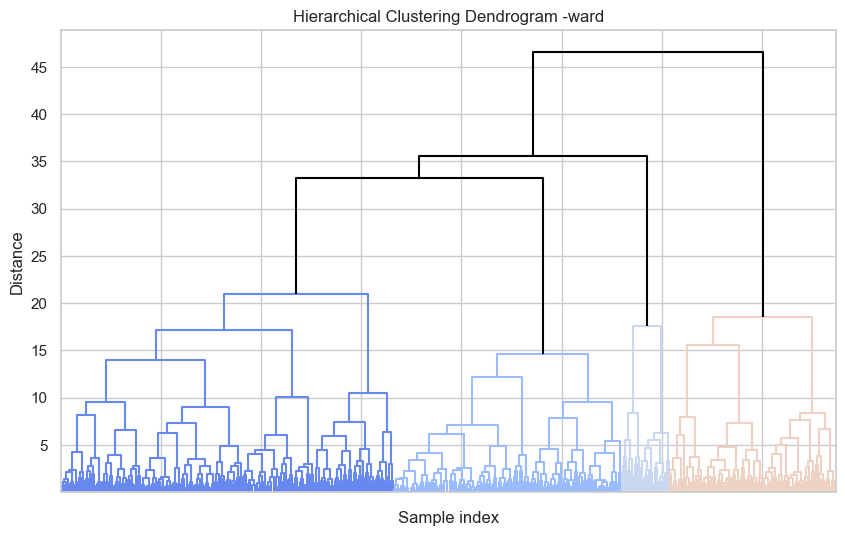

In [18]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Rectangle

# 假设数据已缩放并存储在X_scaled中
# data = pd.DataFrame(X_scaled)

# 计算链接矩阵
linked = linkage(X_scaled, 'ward')

# 确定簇的数量
num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# 定义颜色
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2']
set_link_color_palette(colors)

# 绘制谱系图
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    labels=data.index,
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_font_size=10,  # 数据标签的字体大小
    leaf_rotation=90,   # 标签的旋转角度
    above_threshold_color='black',  # 阈值以上的颜色
    color_threshold=linked[-(num_clusters-1), 2]  # 根据簇数量设定颜色阈值
)

# 稀疏化网格
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))

# # 添加矩形框
# def plot_rectangles(ax, linkage_matrix, num_clusters, cluster_colors):
#     cluster_ids = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
#     for cluster_id in np.unique(cluster_ids):
#         cluster_points = np.where(cluster_ids == cluster_id)[0]
#         x_min = np.min(cluster_points)
#         x_max = np.max(cluster_points)
#         ax.add_patch(Rectangle((x_min - 0.5, 0), x_max - x_min + 1, np.max(linkage_matrix[:, 2]), 
#                                edgecolor=cluster_colors[cluster_id - 1], facecolor='none', lw=2))
# 
# plot_rectangles(ax, linked, num_clusters, colors)

plt.title('Hierarchical Clustering Dendrogram -ward')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


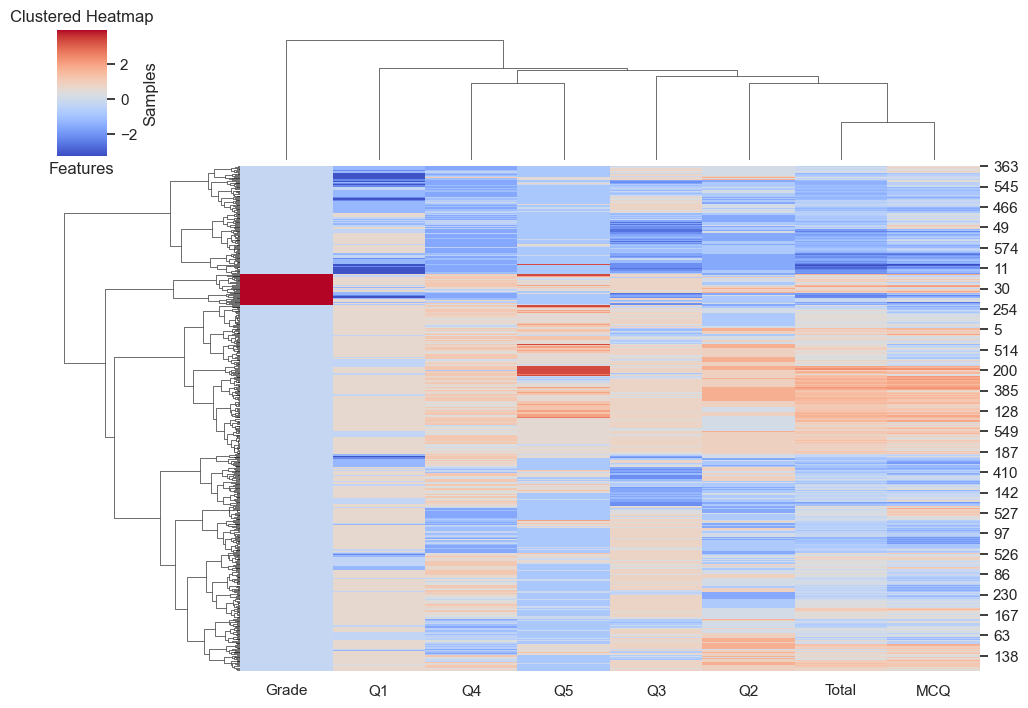

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 提取特征和目标变量
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # 特征
y = data['Programme']  # 目标变量

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

# 使用层次聚类进行聚类（例如，我们设定要得到4个簇）
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels_hiera = agg_clustering.fit_predict(X_scaled)

# 将标签和原始数据结合
data['Cluster-hiera'] = labels_hiera

# 计算链接矩阵用于谱系图和热图
linked = linkage(X_scaled, 'ward')

# 创建一个新的 DataFrame，其中列名称与特征名称一致
X_df = pd.DataFrame(X_scaled, columns=['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# 绘制聚类热图
g=sns.clustermap(
    X_df,
    method='ward',  # 聚类方法
    metric='euclidean',  # 距离度量
    cmap='coolwarm',  # 颜色映射
    row_cluster=True,  # 行聚类
    col_cluster=True,  # 列聚类
    figsize=(10, 7)  # 图表大小
)
plt.title('Clustered Heatmap')

# 
# # 修改行标签
# for label in g.ax_heatmap.get_yticklabels():
#     label.set_text('Sample')
# g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
# 
# # 获取行聚类的分层聚类对象
# row_dendrogram = g.dendrogram_row
# 
# # 给样本的聚类树上色
# dendro_colors = ['#2E9FDF', '#00AFBB', '#E7B800', '#FC4E07']
# for i, cluster in enumerate(row_dendrogram.reordered_ind):
#     row_dendrogram.link_color_list[i] = dendro_colors[clusters[cluster] - 1]
# 重新绘制行聚类的谱系图
# g.dendrogram_row.plot(g.ax_row_dendrogram)

# 设置标题和标签
plt.title('Clustered Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


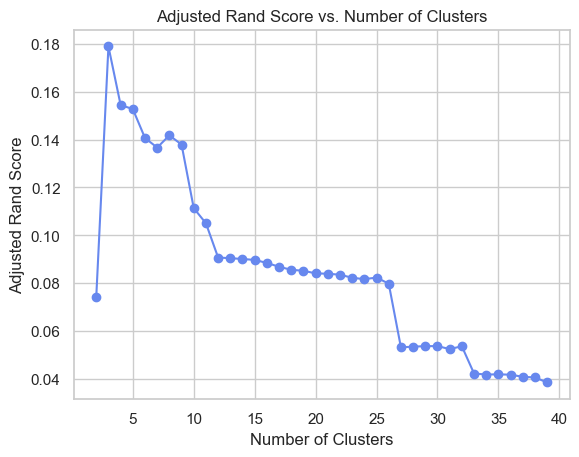

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 假设你已经准备好了数据 X_scaled 和 y

# 初始化空列表，用于存储不同簇数量对应的兰德系数
rand_scores = []

# 尝试不同的簇数量
n_clusters_range = range(2, 40)
for n_clusters in n_clusters_range:
    # 创建并拟合层次聚类模型
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(X_scaled)
    
    # 计算兰德系数
    rand_score = adjusted_rand_score(y, labels)
    rand_scores.append(rand_score)

# 绘制兰德系数随簇数量变化的折线图
plt.plot(n_clusters_range, rand_scores, marker='o')
plt.title('Adjusted Rand Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.show()

linkage: ward, n_clusters: 2, ARI: 0.0741100701378712
linkage: ward, n_clusters: 3, ARI: 0.17903365450527134
linkage: ward, n_clusters: 4, ARI: 0.15452519718557997
linkage: ward, n_clusters: 5, ARI: 0.15282700037180882
linkage: ward, n_clusters: 6, ARI: 0.1407326075320894
linkage: ward, n_clusters: 7, ARI: 0.13669422579511922
linkage: ward, n_clusters: 8, ARI: 0.14182662803113147
linkage: ward, n_clusters: 9, ARI: 0.1379714625284244
linkage: ward, n_clusters: 10, ARI: 0.11134982153958227
linkage: ward, n_clusters: 11, ARI: 0.10502825328789689
linkage: ward, n_clusters: 12, ARI: 0.09068759938163716
linkage: ward, n_clusters: 13, ARI: 0.09041012239007469
linkage: ward, n_clusters: 14, ARI: 0.09007650090030987
linkage: ward, n_clusters: 15, ARI: 0.08968524833248269
linkage: ward, n_clusters: 16, ARI: 0.08843377079776583
linkage: complete, n_clusters: 2, ARI: 0.03760263403577921
linkage: complete, n_clusters: 3, ARI: 0.12726959476512373
linkage: complete, n_clusters: 4, ARI: 0.100625538771

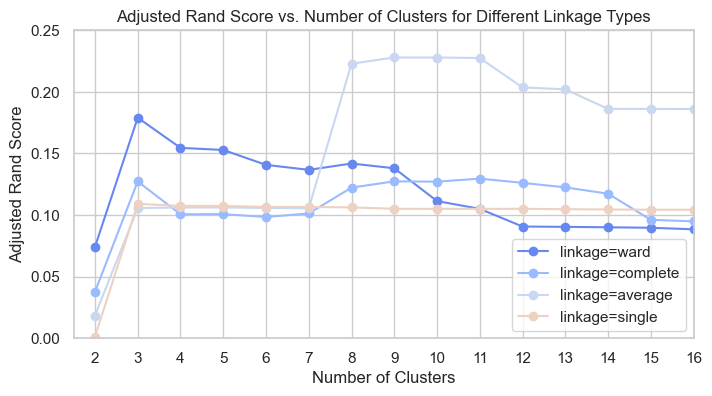

In [19]:
# 定义linkage列表
linkage_types = ['ward', 'complete', 'average', 'single']

# 初始化字典，用于存储不同linkage类型对应的兰德系数
rand_scores_dict = {linkage: [] for linkage in linkage_types}

# 尝试不同的簇数量
n_clusters_range = range(2, 17)

for linkage in linkage_types:
    for n_clusters in n_clusters_range:
        # 创建并拟合层次聚类模型
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg_clustering.fit_predict(X_scaled)
        
        # 计算兰德系数
        rand_score = adjusted_rand_score(y, labels)
        rand_scores_dict[linkage].append(rand_score)
        print(f'linkage: {linkage}, n_clusters: {n_clusters}, ARI: {rand_score}')

# 绘制兰德系数随簇数量变化的折线图
plt.figure(figsize=(8, 4))

for linkage in linkage_types:
    plt.plot(n_clusters_range, rand_scores_dict[linkage], marker='o', label=f'linkage={linkage}')

plt.title('Adjusted Rand Score vs. Number of Clusters for Different Linkage Types')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.ylim(0, 0.25)  # 设置纵坐标范围
plt.xlim(1.5,16)
plt.xticks(n_clusters_range)
plt.legend()
plt.grid(True)
plt.show()

# DBscan

In [ ]:
from sklearn.cluster import DBSCAN  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt  
  
# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data[['Grade', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]# 特征  
y=data['Programme']
# 假设data_no_g3是已经加载好的DataFrame  
# X_rf和y已经定义  
  
# 标准化数据  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X_rf)  
  
# 使用DBSCAN进行聚类  
# eps是邻域大小，min_samples是成为核心对象所需的最小邻居数  
eps = 1.3  # 这个值需要根据你的数据来设定  
min_samples = 3  # 这个值也需要根据你的数据来设定  
dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
labels = dbscan.fit_predict(X_scaled)  
  
# 使用PCA进行降维到2维以便可视化  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
  
# 绘制PCA降维后的数据点  
# -1表示噪声点  
unique_labels = set(labels)  
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]  
  
plt.figure(figsize=(10, 8))  
for k, col in zip(unique_labels, colors):  
    if k == -1:  
        # 黑色用于噪声点  
        col = [0, 0, 0, 1]  
  
    class_member_mask = (labels == k)  
  
    xy = X_pca[class_member_mask]  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)  
  
plt.title("PCA visualization of DBSCAN clustering")  
plt.xlabel("PCA Feature 1")  
plt.ylabel("PCA Feature 2")  
plt.show()

from sklearn.metrics import adjusted_rand_score
# 计算兰德指数（实际上是调整兰德指数ARI）  
ari = adjusted_rand_score(y, labels)  
print(f"Adjusted Rand Index (ARI): {ari}")